In [140]:
import numpy as np
import math
import matplotlib.pyplot as plt
import spline as spl
import newt
# from target_func import f as f 

In [141]:
def f(x, A=1, B=1):
    return A * np.sin(B * x ** 2)

## Ньютон

**Варіант 6**

$$ f(x)=\left\{\begin{array}{l}
(x+1)^{2}+1,-3 \leq x \leq 0 \\
1-8(x-0,5)^{3}, 0 \leq x \leq 1 \\
x-1, \quad 1 \leq x \leq 3
\end{array}\right. $$

**Chebyshev points**
$$ x_{k}=\frac{1}{2}(a+b)+\frac{1}{2}(b-a) \cos \left(\frac{2 k-1}{2 n} \pi\right), \quad k=0, \ldots, n $$

In [142]:
def cheb_nodes(left, right, n):
    return np.array([
        (1/2 * (left + right)) 
            + ((1 / 2 * (right - left)) * math.cos((2 * k - 1) * math.pi / (2 * n)))
           for k in range(1, n + 1)])

def eq_nodes(left, right, n):
    if left > right:
        print("wrong")
    return np.linspace(left, right, n)

In [143]:
n_degree = 20

n_nodes = n_degree + 1
left = -1
right = 1

eq_nodes_x = eq_nodes(left, right, n_nodes)
eq_nodes_y = [f(x) for x in eq_nodes_x]

cheb_nodes_x = cheb_nodes(left, right, n_nodes)
cheb_nodes_y = [f(x) for x in cheb_nodes_x]

In [144]:
# for print
print("Рівновіддалені вузли")
print("{:<8} {:<10} {:<10}".format("i","x_i", "f(x_i)"))
d_eq = dict(zip(eq_nodes_x, eq_nodes_y))
i = 0
for key in d_eq:
    print("{:<8} {:<10} {:<10}".format(i, round(key,2), round(d_eq[key],2)))
    i += 1

Рівновіддалені вузли
i        x_i        f(x_i)    
0        -1.0       0.84      
1        -0.9       0.72      
2        -0.8       0.6       
3        -0.7       0.47      
4        -0.6       0.35      
5        -0.5       0.25      
6        -0.4       0.16      
7        -0.3       0.09      
8        -0.2       0.04      
9        -0.1       0.01      
10       0.0        0.0       
11       0.1        0.01      
12       0.2        0.04      
13       0.3        0.09      
14       0.4        0.16      
15       0.5        0.25      
16       0.6        0.35      
17       0.7        0.47      
18       0.8        0.6       
19       0.9        0.72      
20       1.0        0.84      


In [145]:
# for print
print("Чебишовські вузли")
print("{:<8} {:<10} {:<10}".format("i","x_i", "f(x_i)"))
d_eq = dict(zip(cheb_nodes_x[::-1], cheb_nodes_y[::-1]))
i = 0
for key in d_eq:
    print("{:<8} {:<10} {:<10}".format(i, round(key,2), round(d_eq[key],2)))
    i += 1

Чебишовські вузли
i        x_i        f(x_i)    
0        -1.0       0.84      
1        -0.97      0.81      
2        -0.93      0.76      
3        -0.87      0.68      
4        -0.78      0.57      
5        -0.68      0.45      
6        -0.56      0.31      
7        -0.43      0.19      
8        -0.29      0.09      
9        -0.15      0.02      
10       0.0        0.0       
11       0.15       0.02      
12       0.29       0.09      
13       0.43       0.19      
14       0.56       0.31      
15       0.68       0.45      
16       0.78       0.57      
17       0.87       0.68      
18       0.93       0.76      
19       0.97       0.81      
20       1.0        0.84      


In [146]:
c_equal = newt.div_diff(eq_nodes_x, eq_nodes_y)[0,:]
c_cheb = newt.div_diff(cheb_nodes_x, cheb_nodes_y)[0,:]

In [147]:
x_data = np.arange(left, right, 0.01)
y_data = np.array([f(x) for x in x_data])

y_data_eq_nodes = np.array([newt.newton_poly(c_equal, eq_nodes_x, x) for x in x_data])
y_data_cheb_nodes = np.array([newt.newton_poly(c_cheb, cheb_nodes_x, x) for x in x_data])

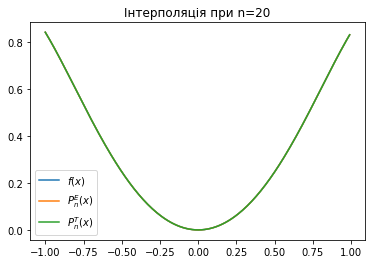

In [148]:
plt.plot(x_data, y_data, label=r"$f(x)$")
plt.plot(x_data, y_data_eq_nodes, label=r"$P_n^E(x)$")
plt.plot(x_data, y_data_cheb_nodes, label=r"$P_n^T(x)$")
# plt.xlim(-3, 3)
# plt.ylim(-10, 10)
#plt.scatter(eq_nodes_x, eq_nodes_y)
plt.title(f"Інтерполяція при n={n_nodes-1}")
# plt.xlabel("x")
# plt.ylabel("y")
plt.legend()

#plt.savefig(f"equal_nodes_f_and_p_{n_nodes}.png", dpi=300)

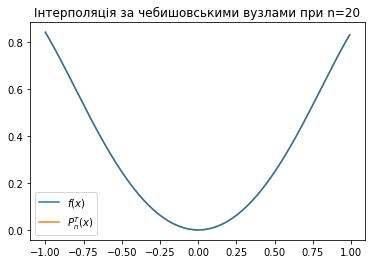

In [149]:
plt.plot(x_data, y_data, label=r"$f(x)$")
plt.plot(x_data, y_data_cheb_nodes, label=r"$P_n^T(x)$", zorder=1)
#plt.scatter(cheb_nodes_x, cheb_nodes_y, zorder=2)
plt.title(f"Інтерполяція за чебишовськими вузлами при n={n_nodes-1}")
# plt.xlabel("x")
# plt.ylabel("y")
plt.legend()

#plt.savefig(f"cheb_nodes_f_{n_nodes}.png", dpi=300)

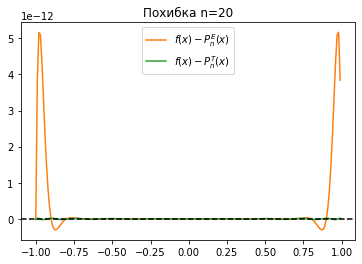

In [150]:
plt.plot(x_data, y_data - y_data_eq_nodes, label=r"$f(x) - P_n^E(x)$", color="tab:orange")
plt.plot(x_data, y_data - y_data_cheb_nodes, label=r"$f(x) - P_n^T(x)$", color="tab:green")
# plt.xlabel("x")
# plt.ylabel("y")
plt.title(f"Похибка n={n_nodes-1}")
plt.axhline(0, color='black', ls="--")
plt.legend()

#plt.savefig(f"equal_nodes_error_{n_nodes}.png", dpi=300)

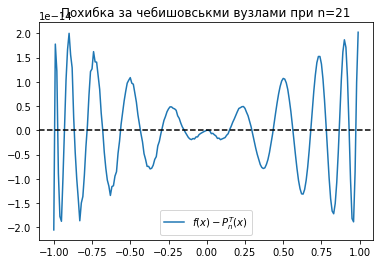

In [151]:
plt.plot(x_data, y_data - y_data_cheb_nodes, label=r"$f(x) - P_n^T(x)$")
# plt.xlabel("x")
# plt.ylabel("y")
plt.title(f"Похибка за чебишовськми вузлами при n={n_nodes}")
plt.axhline(0, color='black', ls="--")
plt.legend()

#plt.savefig(f"cheb_nodes_error_{n_nodes}.png", dpi=300)

# Сплайни

In [152]:
n_intervals = 50
n = n_intervals + 1

x_nodes = np.linspace(-3, 3, n)
y_nodes = [f(x) for x in x_nodes]

A = spl.mat_a(x_nodes)
H = spl.mat_h(x_nodes)
f_ = y_nodes

m_res = np.linalg.solve(A, H @ f_)

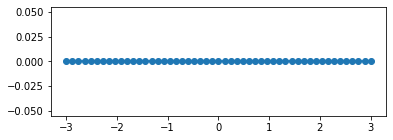

In [153]:
plt.subplots(figsize=(6, 2))
plt.plot(x_nodes, [0 for _ in x_nodes])
plt.scatter(x_nodes, [0 for _ in x_nodes])

$$ Am = Hf$$

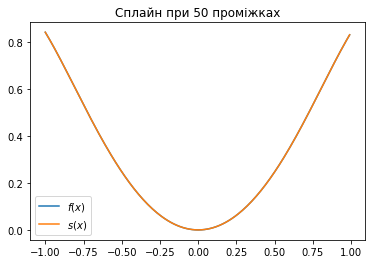

In [154]:
y_data_spline = np.array([spl.smoothing_spline3(x, x_nodes, y_nodes, m_res) for x in x_data])

plt.plot(x_data, y_data, label=r"$f(x)$")
plt.plot(x_data, y_data_spline, label=r"$s(x)$")
#plt.scatter(x_nodes, y_nodes)
#plt.xlabel("x")
#plt.ylabel("y")
plt.title(f"Сплайн при {n_intervals} проміжках")
plt.legend()

#plt.savefig(f"interpolation_spline_{n_intervals}.png", dpi=300)

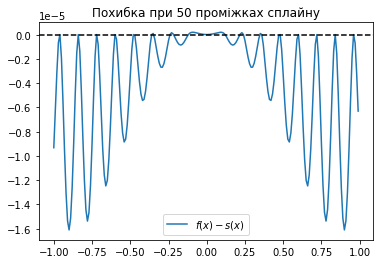

In [155]:
plt.plot(x_data, y_data - y_data_spline, label=r"$f(x)-s(x)$")
plt.axhline(0, color='black', ls="--")
#plt.scatter(x_nodes, y_nodes)
#plt.xlabel("x")
#plt.ylabel("y")
plt.title(f"Похибка при {n_intervals} проміжках сплайну")
plt.legend()

#plt.savefig(f"error_spline_{n_intervals}.png", dpi=300)